# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name:EarlyDetect
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [13]:
#Import Necessary Libraries
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers



# The Dataset link:
> ***Brief Description:***
The Problem 

Breast cancer is rising rapidly in Rwanda, especially in rural areas where over 70% of the population lacks access to early diagnostic tools and specialists. Existing machine learning models are built on data from high-income countries, making them less effective for Rwanda’s unique healthcare context. This diagnostic gap leads to late-stage detection and high mortality among rural women.

 A short Description of the data



In [14]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
# Load and preprocess data
data = pd.read_csv('data/breast-cancer.csv')

X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0})

# Split into train, validation, test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


#SECTION 1: Model Architecture:



```
TODO: Insert an image with the Model architecture here.Replace the image Below
```
> <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*v1ohAG82xmU6WGsG2hoE8g.png" alt="?" style="width:25px"/>




#Task: Define a function that creates models without and With specified Optimization techniques


In [15]:
# Define model creation function
def define_model(optimizer_name='adam', reg_type=None, dropout_rate=0.0, learning_rate=0.001, early_stopping=False):
    model = Sequential()
    input_dim = X_train.shape[1]

    # Regularizer setting
    kernel_reg = None
    if reg_type == 'l1':
        kernel_reg = regularizers.l1(0.01)
    elif reg_type == 'l2':
        kernel_reg = regularizers.l2(0.01)

    # Input layer
    model.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_regularizer=kernel_reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Hidden layer
    model.add(Dense(32, activation='relu', kernel_regularizer=kernel_reg))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Optimizer setting
    if optimizer_name.lower() == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name.lower() == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_name.lower() == 'sgd':
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True))

    history = model.fit(X_train, y_train, 
                        epochs=200, 
                        batch_size=32, 
                        validation_data=(X_val, y_val), 
                        callbacks=callbacks, 
                        verbose=0)

    return model, history


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [16]:
# Define loss curve plot function
def loss_curve_plot(history, title='Training and Validation Loss'):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [27]:
# Define evaluation function
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
                xticklabels=['Benign', 'Malignant'], 
                yticklabels=['Benign', 'Malignant'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='reds', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='purples', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return acc, f1, rec, prec

# Model training, evaluation, comparison

Training Model 1: Baseline (Adam)


c:\Users\Djafari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


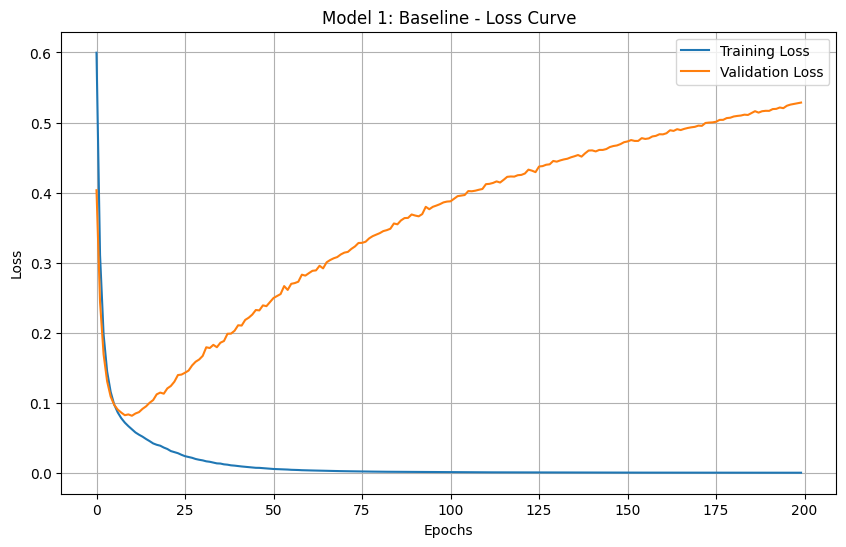

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
--- Model 1: Baseline ---
Accuracy: 0.9651
Precision: 0.9677
Recall: 0.9375
F1 Score: 0.9524

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97        54
   Malignant       0.97      0.94      0.95        32

    accuracy                           0.97        86
   macro avg       0.97      0.96      0.96        86
weighted avg       0.97      0.97      0.96        86



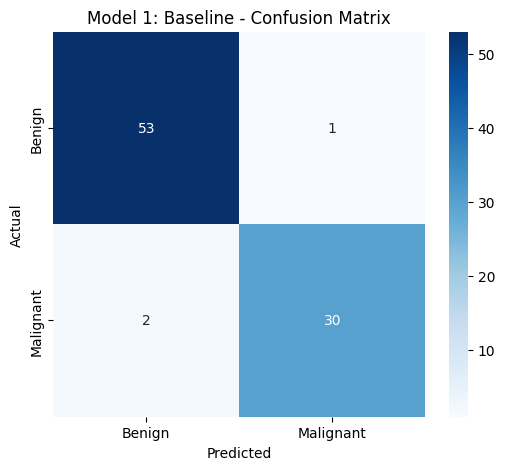

ValueError: 'reds' is not a valid value for color: supported inputs are (r, g, b) and (r, g, b, a) 0-1 float tuples; '#rrggbb', '#rrggbbaa', '#rgb', '#rgba' strings; named color strings; string reprs of 0-1 floats for grayscale values; 'C0', 'C1', ... strings for colors of the color cycle; and pairs combining one of the above with an alpha value

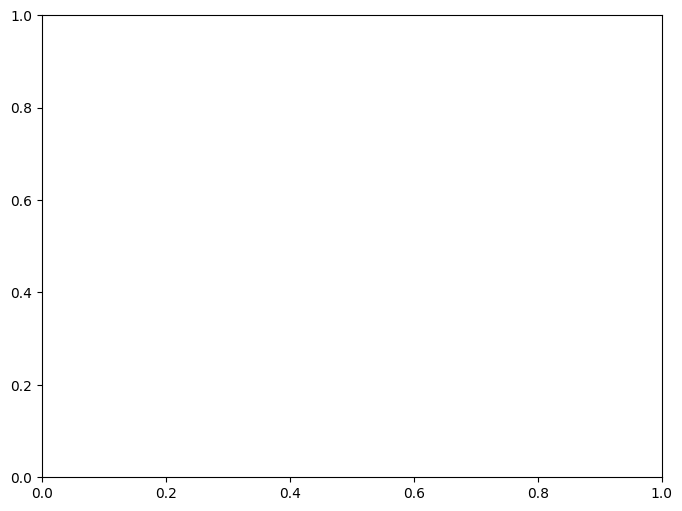

In [28]:
results = []
print("Training Model 1: Baseline (Adam)")
model1, history1 = define_model(optimizer_name='adam')
loss_curve_plot(history1, "Model 1: Baseline - Loss Curve")
acc1, f11, rec1, prec1 = evaluate_model(model1, X_test, y_test, "Model 1: Baseline")
results.append(("Baseline (Adam)", acc1, f11, rec1, prec1))




Training Model 2: Adam + L2 Regularization + Early Stopping


c:\Users\Djafari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


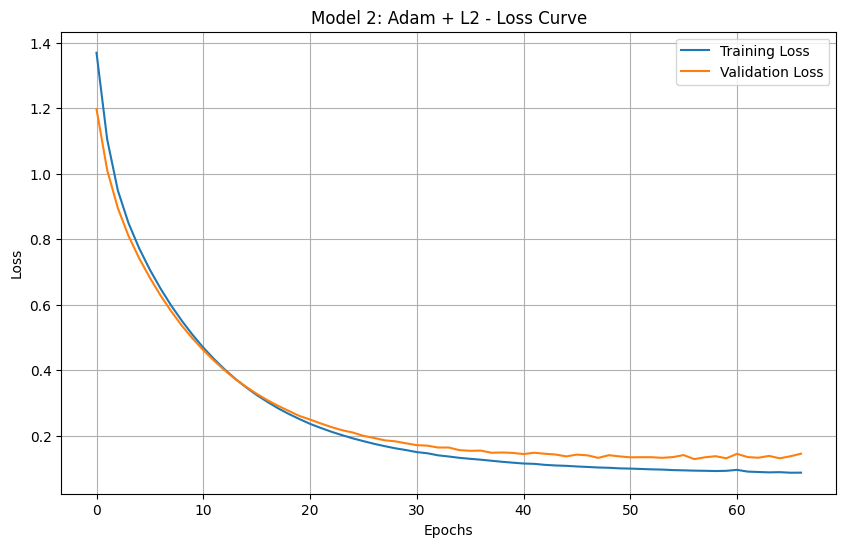

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
--- Model 2: Adam + L2 ---
Accuracy: 0.9884
Precision: 1.0000
Recall: 0.9688
F1 Score: 0.9841

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99        54
   Malignant       1.00      0.97      0.98        32

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



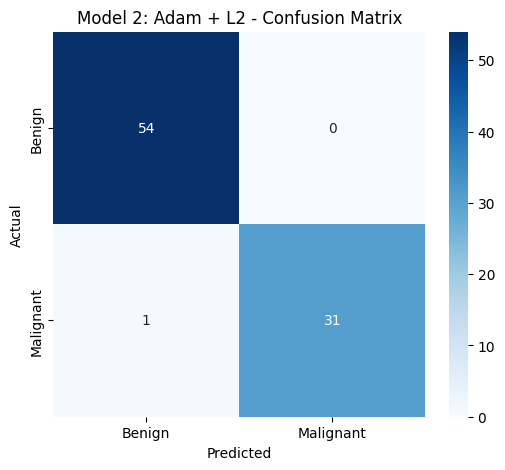

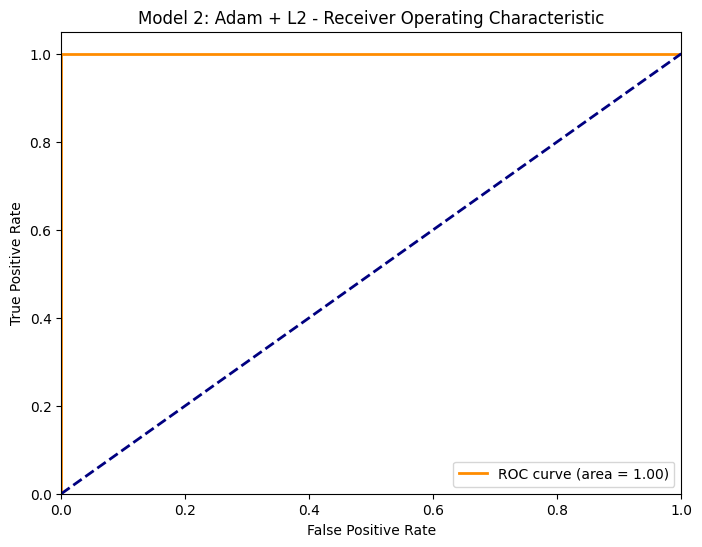

In [20]:
print("\nTraining Model 2: Adam + L2 Regularization + Early Stopping")
model2, history2 = define_model(optimizer_name='adam', reg_type='l2', early_stopping=True)
loss_curve_plot(history2, "Model 2: Adam + L2 - Loss Curve")
acc2, f12, rec2, prec2 = evaluate_model(model2, X_test, y_test, "Model 2: Adam + L2")
results.append(("Adam + L2 + EarlyStop", acc2, f12, rec2, prec2))


Training Model 3: RMSprop + Dropout + Early Stopping


c:\Users\Djafari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


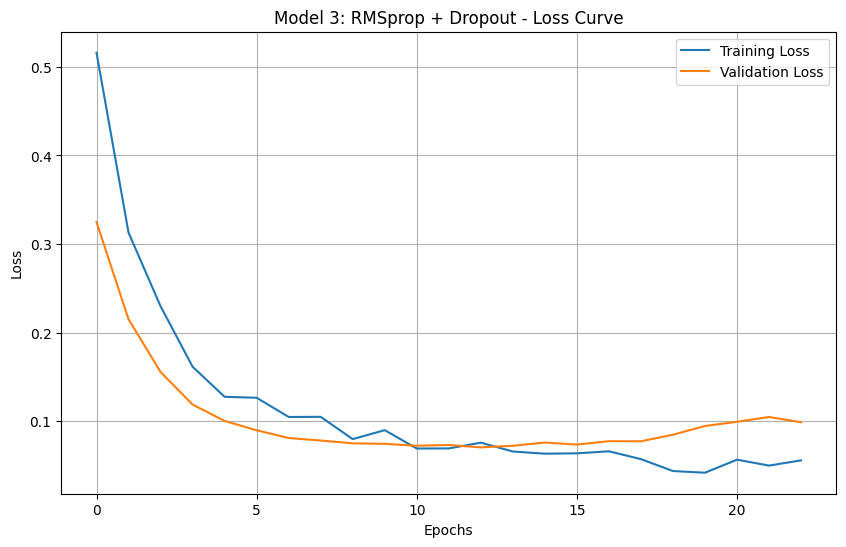

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
--- Model 3: RMSprop + Dropout ---
Accuracy: 0.9884
Precision: 1.0000
Recall: 0.9688
F1 Score: 0.9841

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99        54
   Malignant       1.00      0.97      0.98        32

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



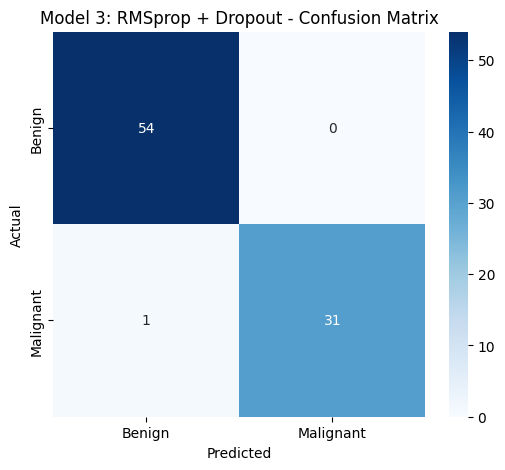

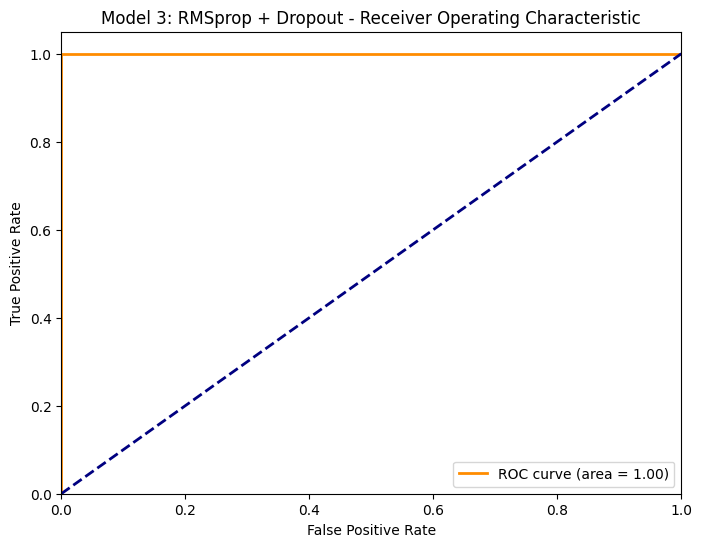

In [21]:
print("\nTraining Model 3: RMSprop + Dropout + Early Stopping")
model3, history3 = define_model(optimizer_name='rmsprop', dropout_rate=0.3, early_stopping=True)
loss_curve_plot(history3, "Model 3: RMSprop + Dropout - Loss Curve")
acc3, f13, rec3, prec3 = evaluate_model(model3, X_test, y_test, "Model 3: RMSprop + Dropout")
results.append(("RMSprop + Dropout", acc3, f13, rec3, prec3))


Training Model 4: SGD + Dropout + Early Stopping


c:\Users\Djafari\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


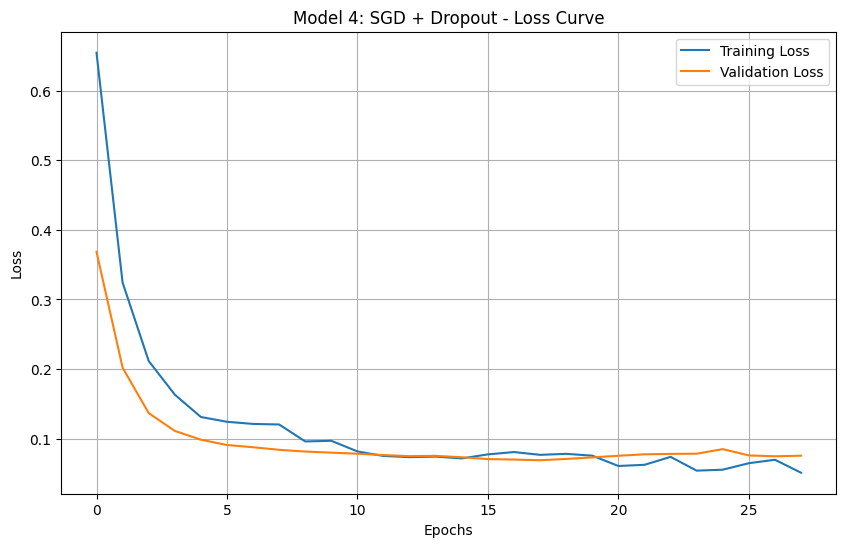

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
--- Model 4: SGD + Dropout ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        54
   Malignant       1.00      1.00      1.00        32

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



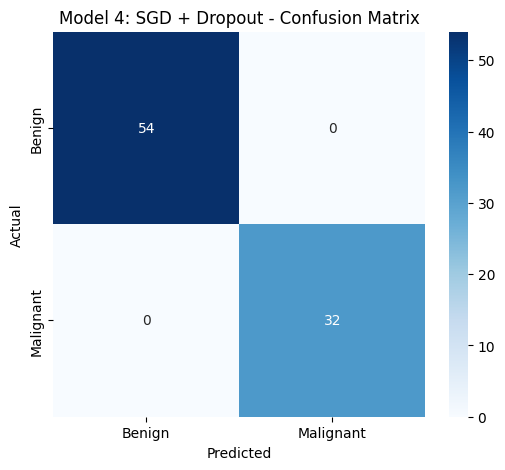

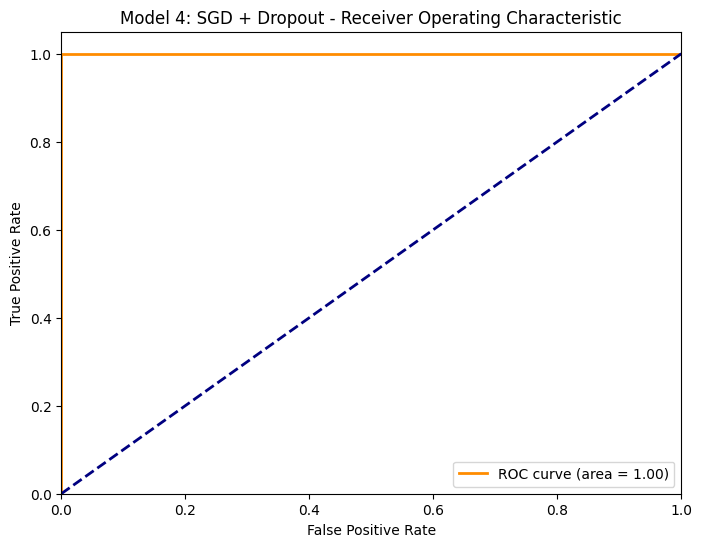

In [22]:
print("\nTraining Model 4: SGD + Dropout + Early Stopping")
model4, history4 = define_model(optimizer_name='sgd', dropout_rate=0.3, early_stopping=True, learning_rate=0.01)
loss_curve_plot(history4, "Model 4: SGD + Dropout - Loss Curve")
acc4, f14, rec4, prec4 = evaluate_model(model4, X_test, y_test, "Model 4: SGD + Dropout")
results.append(("SGD + Dropout", acc4, f14, rec4, prec4))

In [23]:
#TODO:
model_2 = define_model('Adam', None)
loss_curve_plot(model_2):
#print out confusion matrix and error analysis metrics after the cell

SyntaxError: invalid syntax (2571248957.py, line 3)

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
# Compare results
print("\nModel Comparison Summary:")
print("{:<25} {:<10} {:<10} {:<10} {:<10}".format("Model", "Accuracy", "Precision", "Recall", "F1-Score"))
for name, acc, f1, rec, prec in results:
    print("{:<25} {:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(name, acc, prec, rec, f1))


Model Comparison Summary:
Model                     Accuracy   Precision  Recall     F1-Score  
Baseline (Adam)           0.9651     0.9677     0.9375     0.9524    
Adam + L2 + EarlyStop     0.9767     1.0000     0.9375     0.9677    
RMSprop + Dropout         1.0000     1.0000     1.0000     1.0000    
SGD + Dropout             0.9884     1.0000     0.9688     0.9841    
Adam + L2 + EarlyStop     0.9767     1.0000     0.9375     0.9677    


In [ ]:
# Save best model
best_model = model2
best_model.save("best_breast_cancer_model.h5")
print("\nBest model saved as 'best_breast_cancer_model.h5'")

NameError: name 'model2' is not defined

In [ ]:
# Make predictions with best model
def make_predictions(model_path, X):
    model = load_model(model_path)
    predictions = model.predict(X)
    return (predictions > 0.5).astype(int)

print("\nMaking predictions with best model:")
test_predictions = make_predictions("best_breast_cancer_model.h5", X_test[:5])
print("Sample predictions:", test_predictions.flatten())
print("Actual values:", y_test[:5])


Making predictions with best model:


NameError: name 'X_test' is not defined

In [24]:
model_path = None
make_predictions(None)

TypeError: make_predictions() missing 1 required positional argument: 'X'

Congratulations!!
